# Install requirements

In [1]:
!pip install sklearn pandas
!pip install prettytable
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Read dataset

In [2]:
import pandas as pd
from google.colab import drive 
drive = drive.mount('/content/drive') 

Mounted at /content/drive


In [3]:
from prettytable import PrettyTable
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.tree import export_graphviz
from IPython import display
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
test_features = pd.read_csv("/content/drive/MyDrive/new_df/test_set.csv");
test_features 

,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,LCOM5,NL,...,Java Logging Rules,JavaBean Rules,Migration Rules,Naming Rules,Optimization Rules,Security Code Guideline Rules,Strict Exception Rules,String and StringBuffer Rules,Type Resolution Rules,Unnecessary and Unused Code Rules
0,0.823529,0.076923,0.010801,0.031915,0.741573,0.780488,0.056027,0.056091,0.010309,0.024390,...,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.000000
1,0.061069,0.012821,0.001800,0.010638,0.072131,0.064220,0.018676,0.012270,0.010309,0.048780,...,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.037037
2,0.427273,0.089744,0.008101,0.037234,0.379147,0.422222,0.067912,0.066608,0.041237,0.036585,...,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.148148
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020619,0.000000,...,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.000000
4,0.045533,0.012821,0.000900,0.005319,0.029240,0.038610,0.008489,0.008764,0.041237,0.060976,...,0.0,0.0,0.0,0.006494,0.02439,0.0,0.000000,0.0,0.000000,0.037037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010309,0.060976,...,0.0,0.0,0.0,0.000000,0.00000,0.0,0.028571,0.0,0.000000,0.000000
4995,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.051546,0.000000,...,0.0,0.0,0.0,0.006494,0.00000,0.0,0.000000,0.0,0.014706,0.000000
4996,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.041237,0.085366,...,0.0,0.0,0.0,0.000000,0.00000,0.0,0.200000,0.0,0.029412,0.000000
4997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010309,0.036585,...,0.0,0.0,0.0,0.012987,0.00000,0.0,0.000000,0.0,0.000000,0.000000


In [11]:
train_features = pd.read_csv("/content/drive/MyDrive/new_df/train_set.csv");
train_features

,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,LCOM5,NL,...,Java Logging Rules,JavaBean Rules,Migration Rules,Naming Rules,Optimization Rules,Security Code Guideline Rules,Strict Exception Rules,String and StringBuffer Rules,Type Resolution Rules,Unnecessary and Unused Code Rules
0,0.110588,0.038462,0.007651,0.015957,0.087121,0.109524,0.019525,0.020158,0.010309,0.036585,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010309,0.036585,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.028571,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010309,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010309,0.012195,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030928,0.048780,...,0.000000,0.0,0.0,0.006494,0.0,0.0,0.028571,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19990,0.098296,0.038462,0.004950,0.021277,0.102857,0.117371,0.045840,0.043821,0.010309,0.060976,...,0.000000,0.0,0.0,0.058442,0.0,0.0,0.142857,0.000000,0.029412,0.037037
19991,0.241135,0.012821,0.001350,0.005319,0.250000,0.300000,0.010187,0.010517,0.010309,0.024390,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
19992,0.095794,0.012821,0.000900,0.010638,0.125604,0.136646,0.022071,0.019281,0.051546,0.048780,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.028571,0.000000,0.058824,0.037037
19993,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010309,0.036585,...,0.021739,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.037037


In [6]:
train_features.describe(include="all")

,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,LCOM5,NL,...,Java Logging Rules,JavaBean Rules,Migration Rules,Naming Rules,Optimization Rules,Security Code Guideline Rules,Strict Exception Rules,String and StringBuffer Rules,Type Resolution Rules,Unnecessary and Unused Code Rules
count,19995.000000,19995.000000,19995.000000,19995.000000,19995.000000,19995.000000,19995.000000,19995.000000,19995.000000,19995.000000,...,19995.000000,19995.00000,19995.000000,19995.000000,19995.000000,19995.000000,19995.000000,19995.000000,19995.000000,19995.000000
mean,0.130314,0.026917,0.004335,0.022514,0.113025,0.121056,0.035468,0.031946,0.026120,0.033438,...,0.002760,0.00057,0.000475,0.011219,0.008618,0.012792,0.026467,0.024284,0.030796,0.014772
std,0.223544,0.064902,0.022304,0.068888,0.200607,0.208241,0.093526,0.082629,0.047025,0.041162,...,0.027269,0.01816,0.019036,0.028669,0.040490,0.059350,0.077731,0.082158,0.086670,0.066435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010309,0.012195,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010309,0.024390,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.180684,0.025641,0.003150,0.010638,0.149938,0.169492,0.025467,0.024540,0.030928,0.048780,...,0.000000,0.00000,0.000000,0.006494,0.000000,0.000000,0.028571,0.009615,0.014706,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
for col in train_features.columns:
  print(col, train_features[col].max())

CC 1.0
CCL 1.0
CCO 1.0
CI 1.0
CLC 1.0
CLLC 1.0
LDC 1.0
LLDC 1.0
LCOM5 1.0
NL 1.0
NLE 1.0
WMC 1.0
CBO 1.0
CBOI 1.0
NII 1.0
NOI 1.0
RFC 1.0
AD 1.0
CD 1.0
CLOC 1.0
DLOC 1.0
PDA 1.0
PUA 1.0
TCD 1.0
TCLOC 1.0
DIT 1.0
NOA 1.0
NOC 1.0
NOD 1.0
NOP 1.0
LLOC 1.0
LOC 1.0
NA 1.0
NG 1.0
NLA 1.0
NLG 1.0
NLM 1.0
NLPA 1.0
NLPM 1.0
NLS 1.0
NM 1.0
NOS 1.0
NPA 1.0
NPM 1.0
NS 1.0
TLLOC 1.0
TLOC 1.0
TNA 1.0
TNG 1.0
TNLA 1.0
TNLG 1.0
TNLM 1.0
TNLPA 1.0
TNLPM 1.0
TNLS 1.0
TNM 1.0
TNOS 1.0
TNPA 1.0
TNPM 1.0
TNS 1.0
WarningCritical 1.0
WarningMajor 1.0
WarningMinor 1.0
Basic Rules 1.0
Brace Rules 1.0
Clone Implementation Rules 1.0
Controversial Rules 1.0
Design Rules 1.0
Empty Code Rules 1.0
Finalizer Rules 1.0
Import Statement Rules 1.0
J2EE Rules 1.0
JUnit Rules 1.0
Jakarta Commons Logging Rules 1.0
Java Logging Rules 1.0
JavaBean Rules 1.0
Migration Rules 1.0
Naming Rules 1.0
Optimization Rules 1.0
Security Code Guideline Rules 1.0
Strict Exception Rules 1.0
String and StringBuffer Rules 1.0
Type Resolution

In [8]:
test_target = pd.read_csv("/content/drive/MyDrive/new_df/test_set_NB.csv");
test_target

,Number of Bugs
0,0
1,0
2,1
3,0
4,0
...,...
4994,2
4995,2
4996,2
4997,1


In [9]:
train_target = pd.read_csv("/content/drive/MyDrive/new_df/train_set_NB.csv");
train_target 

,Number of Bugs
0,0
1,2
2,0
3,1
4,1
...,...
19990,2
19991,0
19992,0
19993,0


# Call **Decision tree** from `sklearn`

In [16]:
print('Decision tree')
from sklearn import tree

head = PrettyTable(['random_state', 'max_depth', 'confusion_matrix', 'f1_score_micro_test', 'f1_score_micro_train']) 

f1_score_micro_test_array = []
f1_score_micro_train_array = []

max_depth_range = list(range(1, 30))
for depth in max_depth_range:

  '''Create decision tree classifier'''    
  model = tree.DecisionTreeClassifier(max_depth = depth, random_state = 90)
  
  '''Train and test'''
  model.fit(train_features, train_target)
  preds_test = model.predict(test_features)
  preds_train = model.predict(train_features)

  cr = confusion_matrix(test_target, preds_test)

  from sklearn.metrics import f1_score

  f1_weighted = f1_score(test_target, preds_test, average = 'weighted')
  f1_macro = f1_score(test_target, preds_test, average = 'macro')
  f1_micro_test = f1_score(test_target, preds_test, average = 'micro')
  f1_micro_train = f1_score(train_target, preds_train, average = 'micro')

  f1_score_weighted = "%.2f"%round(f1_weighted, 2)
  f1_score_macro = "%.2f"%round(f1_macro, 2)
  f1_score_micro_test = "%.2f"%round(f1_micro_test, 2)
  f1_score_micro_train = "%.2f"%round(f1_micro_train, 2)

  f1_score_micro_test_array.append(f1_score_micro_test)
  f1_score_micro_train_array.append(f1_score_micro_train)

  head.add_row(['90', depth, cr, f1_score_micro_test, f1_score_micro_train])
print(head)


Decision tree
+--------------+-----------+--------------------+---------------------+----------------------+
| random_state | max_depth |  confusion_matrix  | f1_score_micro_test | f1_score_micro_train |
+--------------+-----------+--------------------+---------------------+----------------------+
|      90      |     1     | [[2510    0    0]  |         0.50        |         0.50         |
|              |           |  [1520    0    0]  |                     |                      |
|              |           |  [ 969    0    0]] |                     |                      |
|      90      |     2     | [[2353    0  157]  |         0.50        |         0.50         |
|              |           |  [1377    0  143]  |                     |                      |
|              |           |  [ 805    0  164]] |                     |                      |
|      90      |     3     | [[2417    0   93]  |         0.50        |         0.51         |
|              |           |  [1440 

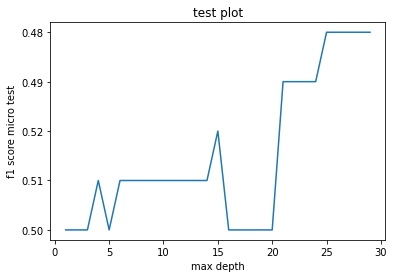

In [17]:
plt.plot(max_depth_range, f1_score_micro_test_array) 
plt.xlabel('max depth') 
plt.ylabel('f1 score micro test') 
plt.title('test plot') 
plt.show()

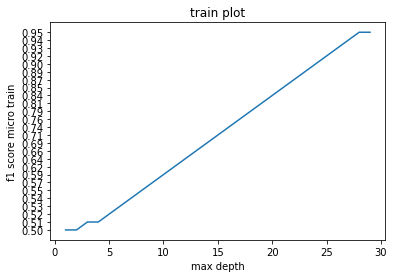

In [18]:
plt.plot(max_depth_range, f1_score_micro_train_array) 
plt.xlabel('max depth') 
plt.ylabel('f1 score micro train') 
plt.title('train plot') 
plt.show()